In [1]:
import os
import re
import pendulum as pendulum
from pymongo import MongoClient
import numpy as np
import pandas as pd
import time
from datetime import datetime,timedelta, timezone
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

pd.set_option('mode.chained_assignment',  None)

In [ ]:
# 1. AI 요약

In [14]:
folder_path = '../raw_data/df_summary'

summary_data = []

for file in sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')]):
    match = re.search(r'df_summary_(\d{4}_\d{2})\.csv', file)
    if match:
        year_month = match.group(1)
        df = pd.read_csv(os.path.join(folder_path, file))
        summary_data.append([year_month, df['userId'].nunique(), df['noteId'].nunique()])

summary = pd.DataFrame(summary_data, columns=['month', 'summary_user', 'summary_cnt'])

In [16]:
summary.to_csv('/home1/irteamsu/sook/summ.csv')

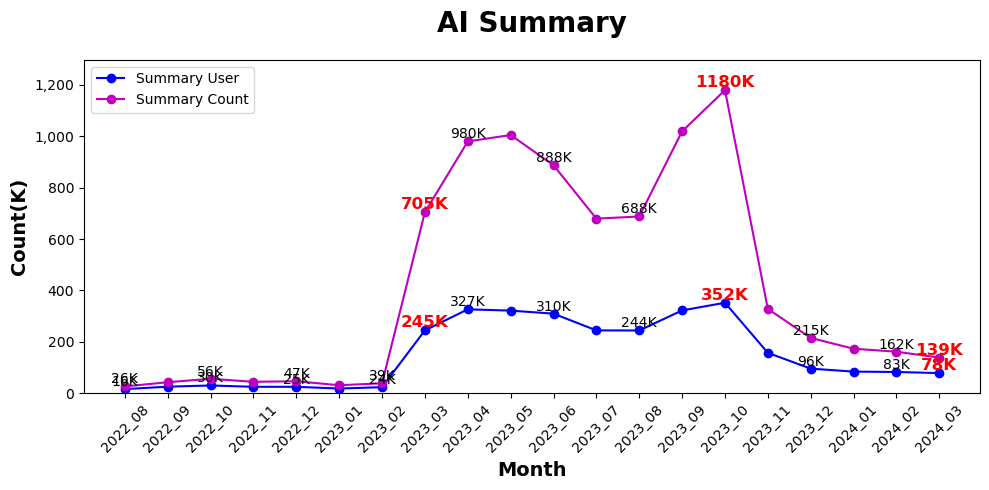

In [13]:
# 그래프 그리기
plt.figure(figsize=(10, 5))

# 첫 번째 라인 그래프 (summary_user)
plt.plot(summary['month'], summary['summary_user'], marker='o', color='b', label='Summary User')

# 두 번째 라인 그래프 (summary_cnt)
plt.plot(summary['month'], summary['summary_cnt'], marker='o', color='m', label='Summary Count')

# 그래프에 제목과 축 레이블 추가
plt.title('AI Summary', fontsize = 20, fontweight = 'bold', pad = 20)
plt.xlabel('Month', fontsize = 14, fontweight = 'bold')
plt.ylabel('Count(K)', fontsize = 14, fontweight = 'bold')

max_value = summary['summary_cnt'].max()
max_ylim = max_value * 1.1
plt.ylim(0, max_ylim)

# x 축 눈금 라벨 회전
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x/1000)))

# 범례 표시
plt.legend(loc='upper left')

highlight_months = {'2024_03', '2023_10','2023_03'}  

for i, (month, cnt, user) in enumerate(zip(summary['month'], summary['summary_cnt'], summary['summary_user'])):
    if month in highlight_months:
        plt.text(month, cnt, f'{cnt / 1000:.0f}K', ha='center', va='bottom', color='red', fontsize=12, fontweight='bold')
        plt.text(month, user, f'{user / 1000:.0f}K', ha='center', va='bottom', color='red', fontsize=12, fontweight='bold')
    else:
        # 일반적인 경우, 매 두 달에 한 번씩 라벨 표시
        if i % 2 == 0:
            plt.text(month, cnt, f'{cnt / 1000:.0f}K', ha='center', va='bottom')
            plt.text(month, user, f'{user / 1000:.0f}K', ha='center', va='bottom')

    
plt.tight_layout()
plt.show()
# plt.savefig('graph/6. ai_summary.png', dpi=300)

In [ ]:
# 2. 노트공유링크 생성

In [8]:
folder_path = '../raw_data/df_sharednote'

sharednote_data = []

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        # 파일명에서 연도와 월 정보 추출
        match = re.search(r'df_sharednote_(\d{4}_\d{2})\.csv', file)
        if match:
            year_month = match.group(1)  # 연도와 월 추출
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            sharednote_data.append([year_month, df['userId'].nunique(), df['noteId'].nunique()])

sharednote = pd.DataFrame(sharednote_data, columns=['month', 'sharednote_user', 'sharednote_cnt'])

In [17]:
sharednote.to_csv('/home1/irteamsu/sook/share.csv')

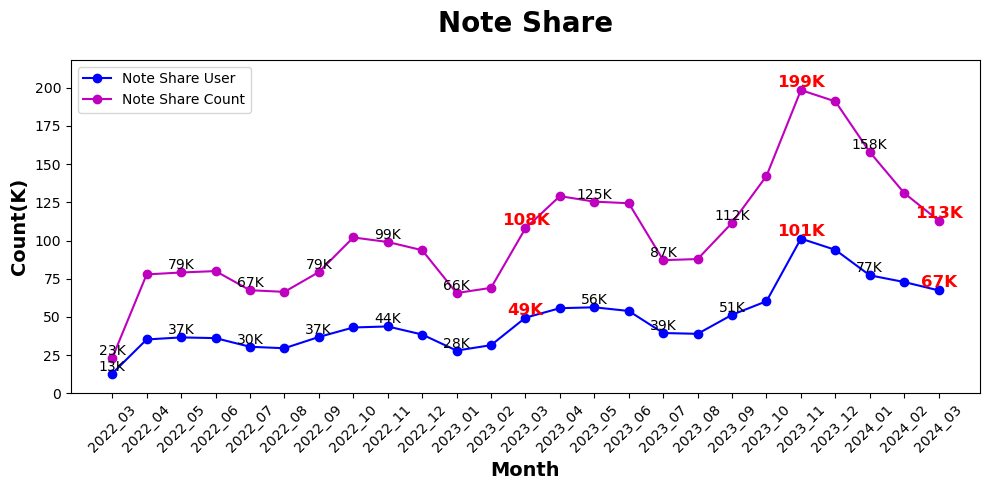

In [12]:
plt.figure(figsize=(10, 5))

# 첫 번째 라인 그래프 (summary_user)
plt.plot(sharednote['month'], sharednote['sharednote_user'], marker='o', color='b', label='Note Share User')

# 두 번째 라인 그래프 (summary_cnt)
plt.plot(sharednote['month'], sharednote['sharednote_cnt'], marker='o', color='m', label='Note Share Count')

plt.title('Note Share', fontsize = 20, fontweight = 'bold', pad = 20)
plt.xlabel('Month', fontsize = 14, fontweight = 'bold')
plt.ylabel('Count(K)', fontsize = 14, fontweight = 'bold')

max_value = sharednote['sharednote_cnt'].max()
max_ylim = max_value * 1.1
plt.ylim(0, max_ylim)

# x 축 눈금 라벨 회전
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x/1000)))

plt.legend()

    
highlight_months = {'2024_03', '2023_11','2023_03'}  # 집합(set)으로 정의

for i, (month, cnt, user) in enumerate(zip(sharednote['month'], sharednote['sharednote_cnt'], sharednote['sharednote_user'])):
    if month in highlight_months:
        plt.text(month, cnt, f'{cnt / 1000:.0f}K', ha='center', va='bottom', color='red', fontsize=12, fontweight='bold')
        plt.text(month, user, f'{user / 1000:.0f}K', ha='center', va='bottom', color='red', fontsize=12, fontweight='bold')
    else:
        # 일반적인 경우, 매 두 달에 한 번씩 라벨 표시
        if i % 2 == 0:
            plt.text(month, cnt, f'{cnt / 1000:.0f}K', ha='center', va='bottom')
            plt.text(month, user, f'{user / 1000:.0f}K', ha='center', va='bottom')


plt.tight_layout()
plt.show()
# plt.savefig('graph/7. note_share.png', dpi=300)